In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Homework 2

1. Bootstrap
2. Estimation and Confidence Intervals

## Task 1

Bootstrap replicates of other statistics

The mean is just one of many sample summaries that we might be interested in. 
Recall the Auto data, in particular the boxplot of mpg ~ cylinders. The graph suggested that not only does the mean mpg seem too decrease with number of cylinders but also the variation.
Let us get **confidence intervals** of the stdev for cyl = 4 and compare to cyl=6. 


1. Generate bootstrap replicates for the stdev of the mpg and plot the histograms and ecdfs of the replicates.
2. "Compute" the 95% confidence interval(s) which supposedly contains the true standard deviation(s).
3. Argue intuitively whether the stdevs are clearly different.

In [ ]:
# running our functions
%run ../ourFunctions.py
%precision 3

### Create functions for bootstrap samples and ecdf

In [2]:
def draw_bs_reps(data, func = np.mean, size=100):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Load data and generate bootstrap replicates for the stdev of the mpg

In [4]:
# load the dataframe
cars = pd.read_csv('../data/Auto.csv')

In [5]:
cars4 = draw_bs_reps(cars[cars.cylinders == 4]["mpg"], np.std, size=100)
cars6 = draw_bs_reps(cars[cars.cylinders == 6]["mpg"], np.std, size=100)

### Plot the histograms and ecdfs of the replicates

Text(0.5, 1.0, '6 cylinders')

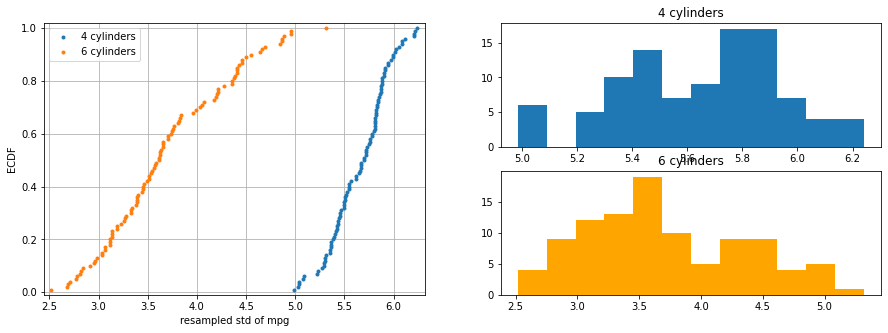

In [6]:
# Compute ECDF for cars with 4 and 6 cylinders
x_4, y_4 = ecdf(cars4)
x_6, y_6 = ecdf(cars6)

# Create 3 subplots for ECDF and Histograms
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

#------------------
# Plot all ECDFs on the same plot
ax1.plot(x_4, y_4, marker = '.', linestyle = 'none')
ax1.plot(x_6, y_6, marker = '.', linestyle = 'none')

# Make nice margins
ax1.margins(0.02)

# Annotate the plot
ax1.set_xlabel('resampled std of mpg')
ax1.set_ylabel('ECDF')
ax1.legend(["4 cylinders", "6 cylinders"])

# Add grid
ax1.grid()

#------------------
#Plot historgram 4 cylinders 
ax2.hist(x=cars4, bins=12)
ax2.set_title("4 cylinders")

#-----------------
#Plot historgram 6 cylinders 
ax3.hist(x=cars6, color="orange", bins=12)
ax3.set_title("6 cylinders")

### "Compute" the 95% confidence interval(s) which supposedly contains the true standard deviation(s)

In [7]:
cars4_95_conf = np.round(np.percentile(cars4,[2.5,97.5]),3)
print(f"95% confidence interval for std of cars with 4 cylinders: {cars4_95_conf}")

95% confidence interval for std of cars with 4 cylinders: [5.039 6.208]


In [8]:
cars6_95_conf = np.round(np.percentile(cars6,[2.5,97.5]),3)
print(f"95% confidence interval for std of cars with 4 cylinders: {cars6_95_conf}")

95% confidence interval for std of cars with 4 cylinders: [2.7   4.922]


### Argue intuitively whether the stdevs are clearly different.

I am not sure, if I understood the question correctly, but I think the stdevs for cars with 4 cylinders and 6 cylinders are clearly different, because 95% of the stdevs of cars with 4 cylinders lie between [5.025 6.187], whereas 95% of the stdevs of cars with 6 cylinders lie between [2.767 4.795]

## Task 2

1. Read chapters 3-8 in the [ThinkStats](https://greenteapress.com/wp/think-python-2e/) book in the cloud folder.
2. Work on exercises 4.1 and 4.2:

**Exercise 4.1** How much did you weigh at birth? If you don't know, call your mother or someone else who knows. Using the NSFG data (all live births),
compute the distribution of birth weights and use it to find your percentile
rank. If you were a first baby, find your percentile rank in the distribution
for first babies. Otherwise use the distribution for others. If you are in the
90th percentile or higher, call your mother back and apologize.

**Exercise 4.2** The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?

In [9]:
#I have prepared the data for you in our data folder:
import pandas as pd
import numpy as np
%precision 3

#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
preg=pd.read_csv('../data/pregNSFG.csv.gz',index_col=0)

#only look at live births
live = preg[preg.outcome == 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


babysex
1.0    7.411409
2.0    7.115526
Name: totalwgt_lb, dtype: float64

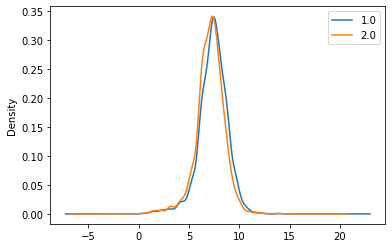

In [10]:
live.groupby("babysex").totalwgt_lb.plot(kind='density', legend=True)
live.groupby("babysex").totalwgt_lb.mean()

### Exercise 4.1

Compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [11]:
#Filter df for first babies 
live_first = live[live["pregordr"] ==1]

#Drop rows with NaN values in column "pregordr"
live_first = live_first[["totalwgt_lb"]].dropna()

In [12]:
def percentile_rank(your_score, scores):
    '''Returns the percentile rank of score relative to the values in the sequence scores'''
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [13]:
my_weight_g = 3500 #my weight in gramms
my_weight_lb = my_weight_g / 412 #Change dimension to lb

#Compute my percentile rank 
my_rank = percentile_rank(my_weight_lb, live_first["totalwgt_lb"])
my_rank

84.562

### Exercise 4.2

The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?

Text(0.5, 1.0, 'PMF')

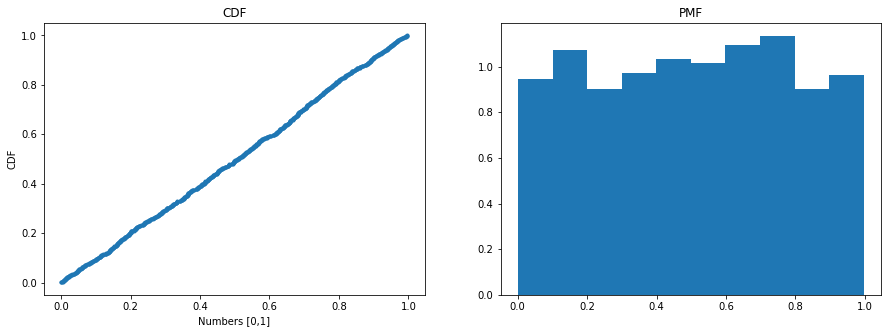

In [14]:
rand_no = np.random.random(1000)

fig1, (ax21, ax22) = plt.subplots(1,2, figsize=(15,5))

#CDF
x_1000, y_1000 = ecdf(rand_no)
ax21.plot(x_1000, y_1000, marker = '.', linestyle = 'none')
ax21.set_xlabel("Numbers [0,1]")
ax21.set_ylabel("CDF")
ax21.set_title("CDF")

#PMF
ax22.hist(rand_no, density=True, bins=10)
ax22.set_title("PMF")

The distribution is uniform, because:
- The CDF follows a linear function which starts in the origin and increases evenly until 1
- Each bin of the PMF is close to 1

However, there are still some deviations from an uniform distribution. The distribution would converge even more towards a uniform distribution, if we increase the sample size.